<h2><center><font color='red'>Importing Libraries</font></h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

sns.set_style('darkgrid')
%matplotlib inline

<h2><center><font color='red'>Loading the Dataset</font></h2>

In [2]:
dataset = sns.load_dataset('iris')
print(dataset.head(5))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


<h2><center><font color='red'>Looking at all possible values for the "species" attribute</font></h2>

In [4]:
print(dataset.species.unique())

['setosa' 'versicolor' 'virginica']


<h2><center><font color='red'>Using label encoder for encoding species</font></h2>

In [6]:
encode = {'setosa':0, 'versicolor':1, 'virginica':2}
decode = {0:'setosa', 1:'vericolor', 2:'virginica'}

In [7]:
dataset['species'] = dataset['species'].map(encode)
print(dataset.species.unique())

[0 1 2]


<h2><center><font color='red'>Creating Train and Test sets</font></h2>

In [8]:
features = dataset.drop(columns=['species'])
target = dataset['species']

xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2)

<h2><center><font color='red'>Defining and Training the Model</font></h2>

In [9]:
model = GaussianNB()
model.fit(xtrain, ytrain)

GaussianNB()

<h2><center><font color='red'>Predicting the values and checking metrics</font></h2>

In [10]:
ypred = model.predict(xtest)

print(f"Accuracy = {round(accuracy_score(ytest, ypred)*100, 4)}%")

Accuracy = 96.6667%


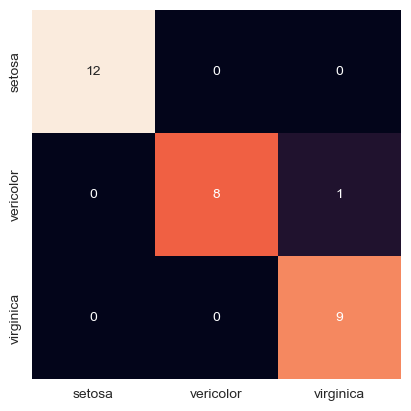

In [11]:
sns.heatmap(pd.crosstab(ytest.reset_index(drop=True).map(decode), pd.Series(ypred).map(decode)), fmt='d', annot=True, square=True, cbar=False)
plt.xlabel("")
plt.ylabel("")
plt.show()